# 8.6 模型评价与优化

 ## 酶活性预测实战

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week6/T-R-train.csv')
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [3]:
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

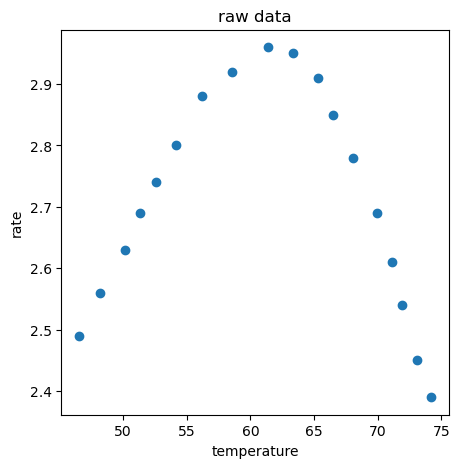

In [4]:
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [6]:
X_train = np.array(X_train).reshape(-1,1)

In [7]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [8]:
data_test = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week6/T-R-test.csv')
data_test.head()

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618


In [9]:
X_test = data_test.loc[:,'T']
y_test = data_test.loc[:,'rate']

In [10]:
X_test = np.array(X_test).reshape(-1,1)

In [11]:
#make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print('training r2:',r2_train)
print('test r2:',r2_test)

training r2: 0.016665703886981964
test r2: -0.758336343735132


In [12]:
#generate new data
X_range = np.linspace(40,90,300).reshape(-1,1)
y_range_predict = lr1.predict(X_range)

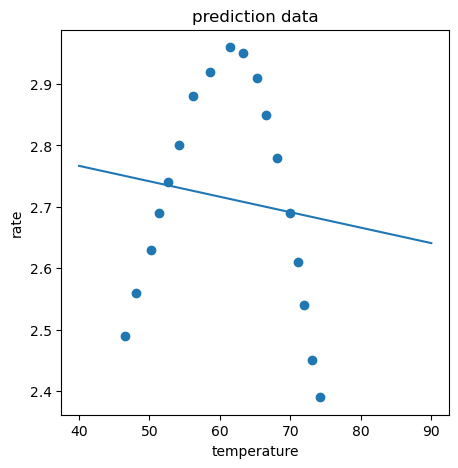

In [13]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_range_predict)
plt.scatter(X_train,y_train)

plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [20]:
# 多项式模型
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)

poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)

In [22]:
lr2 = LinearRegression()
lr2.fit(X_2_train,y_train)

y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train,y_2_train_predict)
r2_2_test = r2_score(y_test,y_2_test_predict)
print('training r2_2:',r2_2_train)
print('test r2_2:',r2_2_test)

lr2 = LinearRegression()
lr2.fit(X_5_train,y_train)

y_5_train_predict = lr2.predict(X_5_train)
y_5_test_predict = lr2.predict(X_5_test)
r2_5_train = r2_score(y_train,y_5_train_predict)
r2_5_test = r2_score(y_test,y_5_test_predict)
print('training r2_5:',r2_5_train)
print('test r2_5:',r2_5_test)

training r2_2: 0.9700515400689422
test r2_2: 0.9963954556468684
training r2_5: 0.9978527267187439
test r2_5: 0.5437837627380017


In [24]:
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

ValueError: X has 3 features, but LinearRegression is expecting 6 features as input.

In [26]:
X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr2.predict(X_5_range)

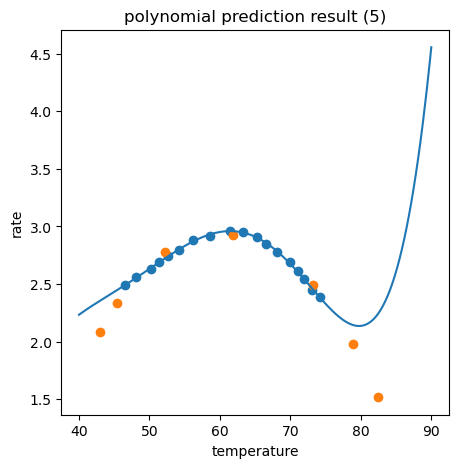

In [27]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_5_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title('polynomial prediction result (5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

## 芯片质量好坏预测

In [28]:
data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week6/data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [29]:
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

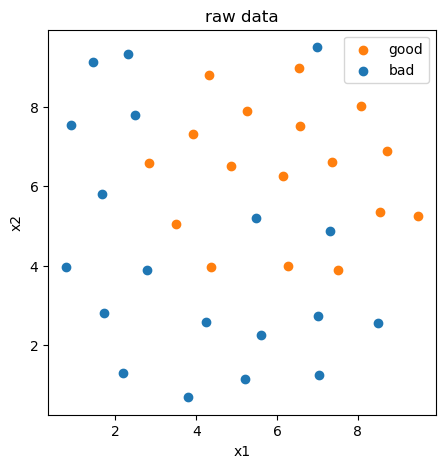

In [30]:
fig1 = plt.figure(figsize=(5,5))
bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad),('good','bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [31]:
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(X[y==0])
y_predict_bad = ad_model.predict(X[y==0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


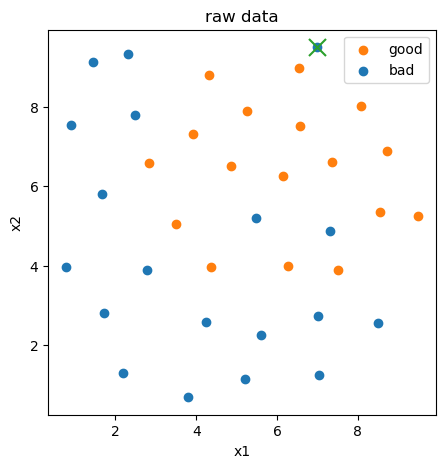

In [32]:
fig2 = plt.figure(figsize=(5,5))
bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.scatter(X.loc[:,'x1'][y==0][y_predict_bad==-1],X.loc[:,'x2'][y==0][y_predict_bad==-1],marker='x',s=150)
plt.legend((good,bad),('good','bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [33]:
data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week6/data_class_processed.csv')
data.head()
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

[0.5369408 0.4630592]


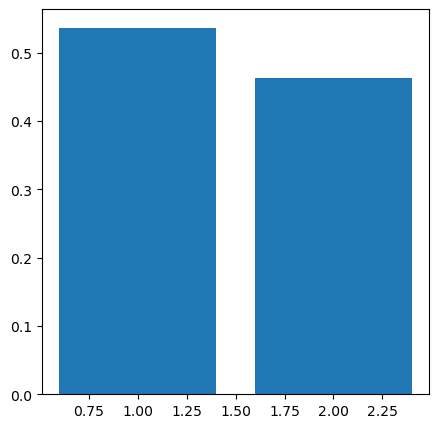

In [34]:
#pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
fig4 = plt.figure(figsize=(5,5))
plt.bar([1,2],var_ratio)
plt.show()

In [35]:
# train and test split: random_state=4,test_size=0.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4,test_size=0.4)
print(X_train.shape,X_test.shape,X.shape)

(21, 2) (14, 2) (35, 2)


In [37]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)
y_train_predict = knn_10.predict(X_train)
y_test_predict = knn_10.predict(X_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print("trianing accuracy:",accuracy_train)
print('testing accuracy:',accuracy_test)

trianing accuracy: 0.9047619047619048
testing accuracy: 0.6428571428571429


In [38]:
#visualize the knn result and boundary
xx, yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
print(yy.shape)

(200, 200)


In [39]:
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)

(40000, 2)


In [40]:
y_range_predict = knn_10.predict(x_range)

C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


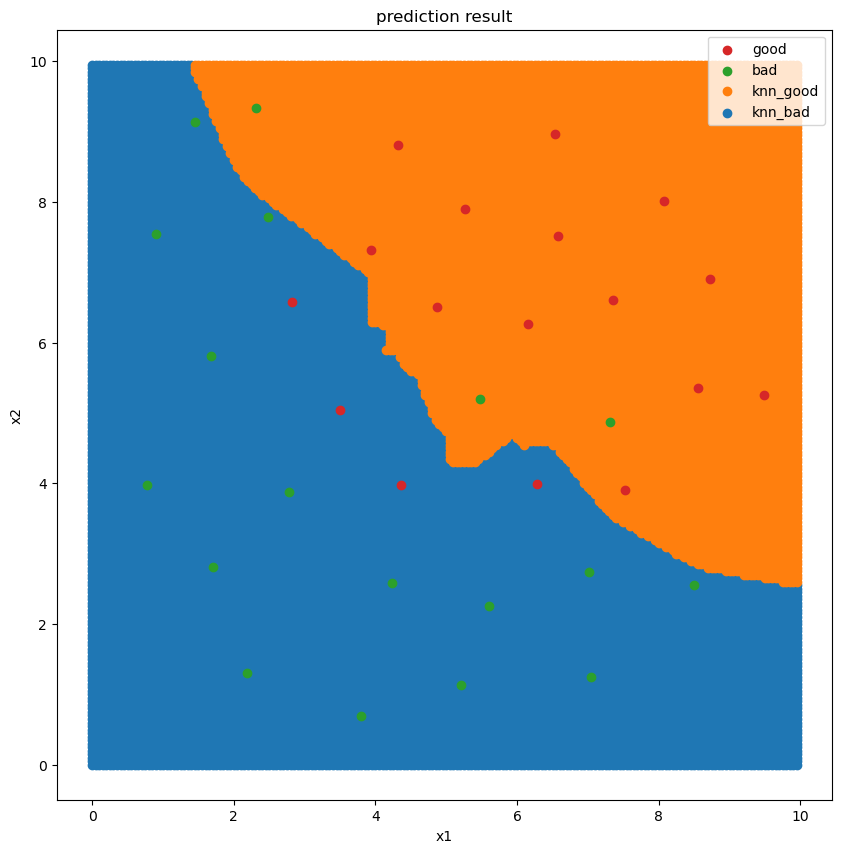

In [41]:
fig4 = plt.figure(figsize=(10,10))
knn_bad = plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0])
knn_good = plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1])



bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad,knn_good,knn_bad),('good','bad','knn_good','knn_bad'))
plt.title('prediction result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict)
print(cm)

[[4 2]
 [3 5]]


In [43]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(TP,TN,FP,FN)

5 4 2 3


In [44]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(accuracy)

0.6428571428571429


In [45]:
recall = TP/(TP + FN)
print(recall)

0.625


In [46]:
specificity = TN/(TN + FP)
print(specificity)

0.6666666666666666


In [47]:
precision = TP/(TP + FP)
print(precision)

0.7142857142857143


In [48]:
f1 = 2*precision*recall/(precision+recall)
print(f1)

0.6666666666666666


In [49]:
#try different k and calcualte the accuracy for each
n = [i for i in range(1,21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    accuracy_train_i = accuracy_score(y_train,y_train_predict)
    accuracy_test_i = accuracy_score(y_test,y_test_predict)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
print(accuracy_train,accuracy_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714] [0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


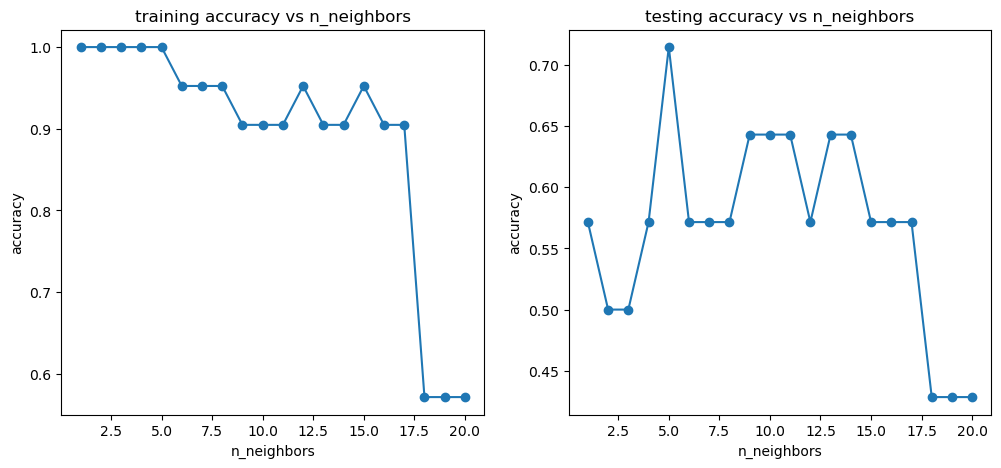

In [50]:
fig5 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(n,accuracy_train,marker='o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.subplot(122)
plt.plot(n,accuracy_test,marker='o')
plt.title('testing accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.show()